In [1]:

import colour_scheme as cs

import importlib
importlib.reload(cs)
import scanpy as sc
sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=250, format='pdf')
import numpy as np
import pandas as pd
from scipy import io
from matplotlib.pyplot import rc_context
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm


viridis = cm.get_cmap('YlGnBu', 256)
newcolors = viridis(np.linspace(0, 1, 256))

pink = np.array([211/256, 211/256, 211/256, 1])

newcolors[:25, :] = pink
newcmp = ListedColormap(newcolors)

sc.settings.set_figure_params(dpi=100, fontsize=10, dpi_save=350, format='.png')
sc.settings.figdir = path_fig
from pathlib import Path
path_fig = ''
path_file = ''

In [ ]:
adata = sc.read_h5ad(Path(path_file)/'exp1_processed_5.h5ad')
umap_rss = pd.read_csv(Path(path_file)/ 'umap_rss.tsv', sep='\t')
adata.obsm['umap_rss'] = umap_rss.values
rss = pd.read_csv(Path(path_file)/ 'rss.tsv', sep='\t')
adata.obsm['rss'] = rss.values

In [3]:
origin = adata.obs['RNA_snn_res.1'].unique().categories.tolist()

cell_types = [
    "Telencephalic Progenitors",
    "Telencephalic Progenitors",
    "Telencephalic Progenitors",
    "Telencephalic Progenitors",
    "Spinal Cord Progenitors",
    "Spinal Cord Progenitors",
    "Midbrain Progenitors",
    "Neuroectoderm/Neuroepithelium",
    "Hindbrain Progenitors",
    "Hypothalamic Progenitors",
    "CNS Neurons",
    "Telencephalic Progenitors",
    "Cortical Hem/Diencephalon",
    "CNS Neurons",
    "Floor Plate",
    "CNS Neurons",
    "Hypothalamic Progenitors",
    "CNS Neurons",
    "CNS Neurons",
    "Floor Plate",
    "Midbrain Progenitors",
    "Retinal Progenitors",
    "Non-neurectodermal tissues",
    "Non-neurectodermal tissues",
    "CNS Neurons",
    "Neural Crest",
    "PNS Neurons",
    "Non-neurectodermal tissues",
    "CNS Neurons",
    "Non-neurectodermal tissues",
    "Non-neurectodermal tissues",
    "Non-neurectodermal tissues"
]
dflab = pd.DataFrame()
dflab['RNA_snn_res.1'] = origin
dflab['fullname_v5'] = cell_types

adata.obs = adata.obs.merge(dflab, on='RNA_snn_res.1', how='left')

adata.obs.index = adata.obs.original_name.copy()

adata.obs.index.name = None

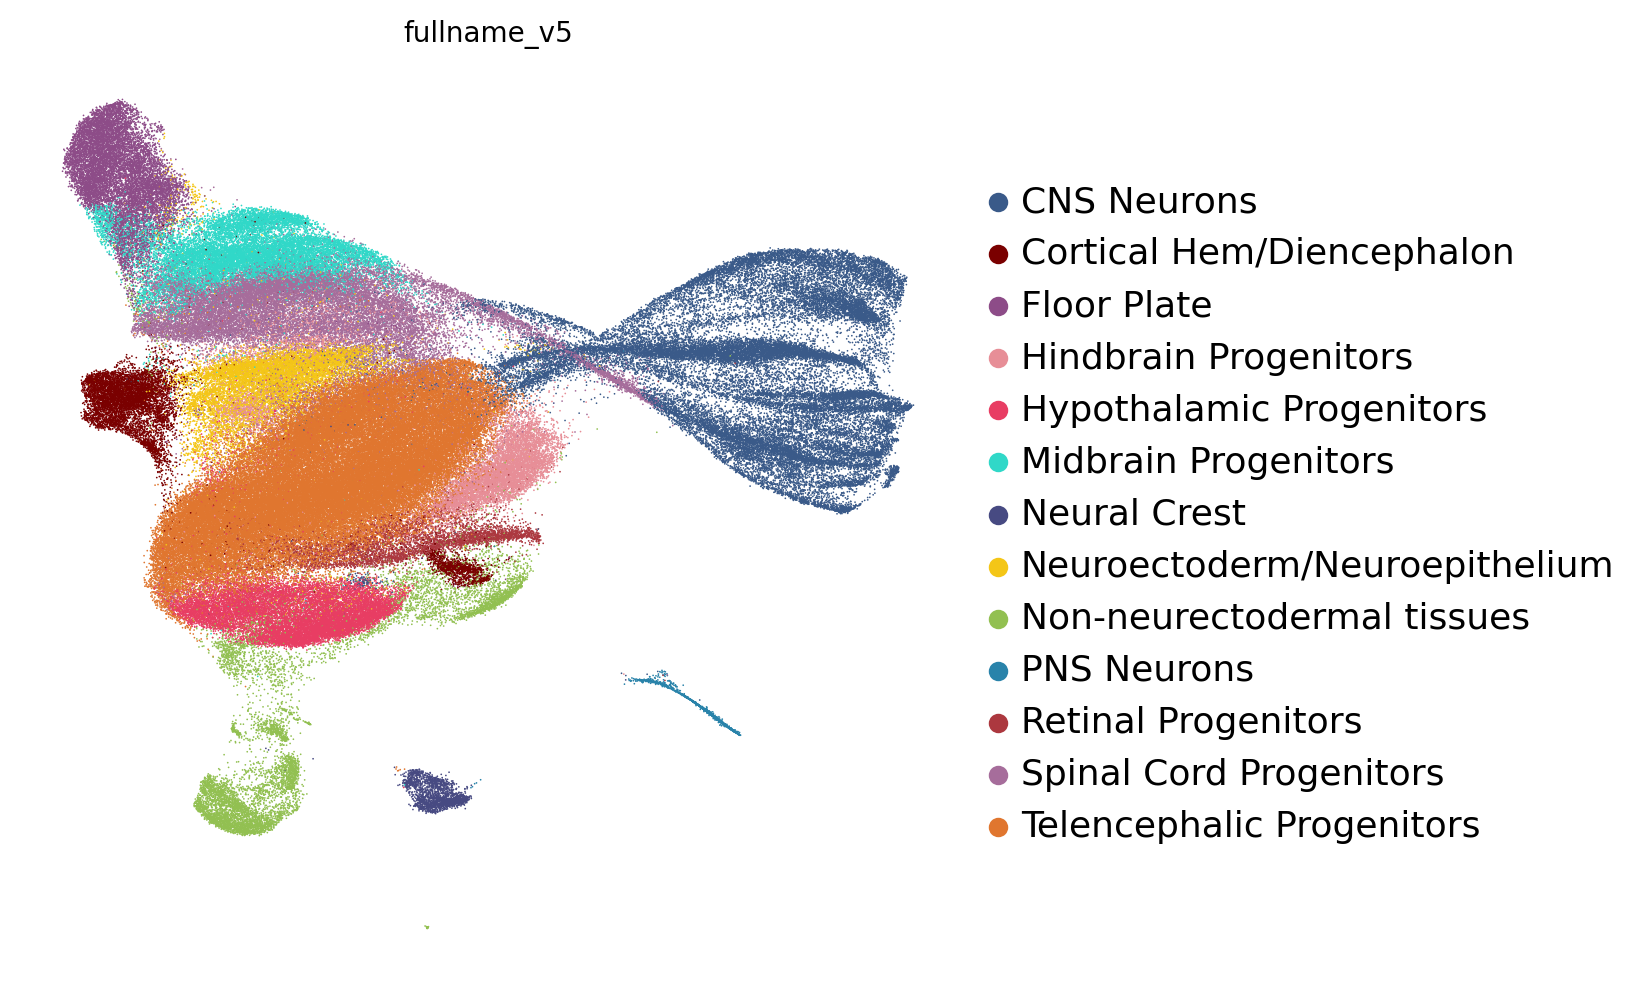

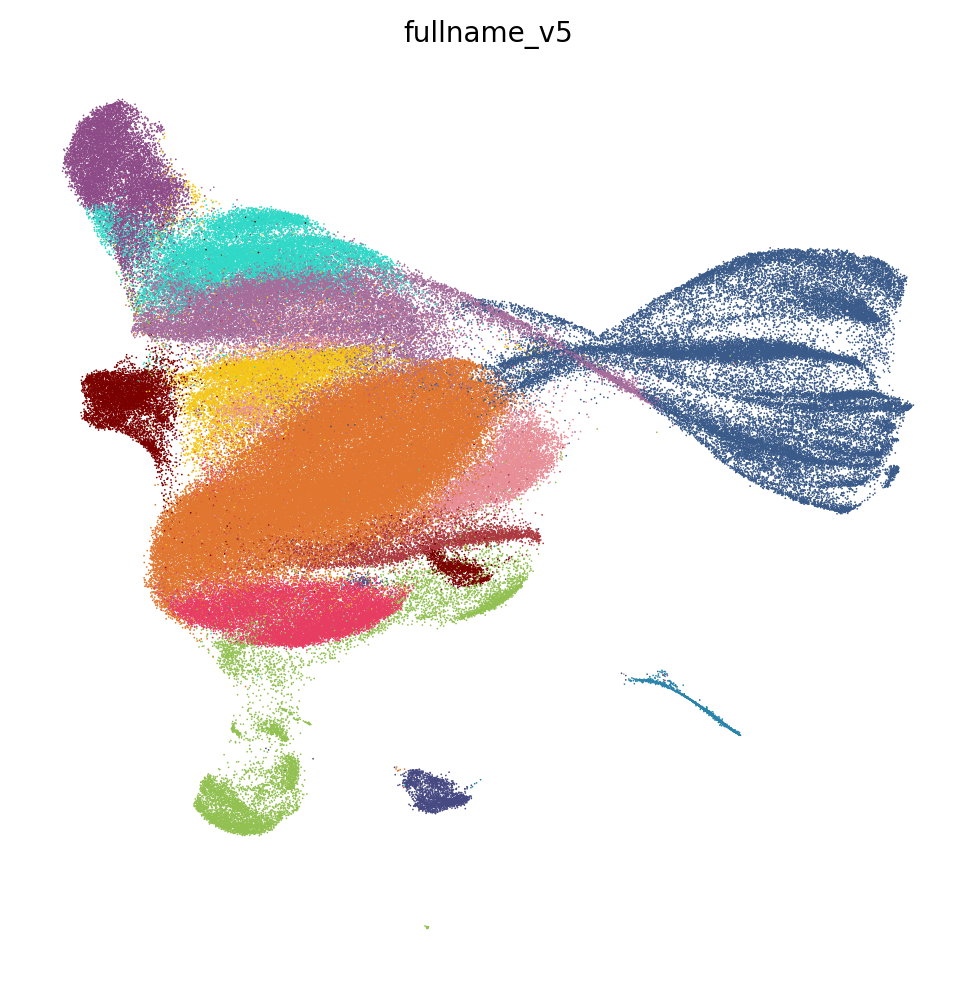

In [4]:
plt.rcParams['pdf.fonttype'] = 42
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.embedding(adata, basis='umap_rss',color=['fullname_v5'], 
               frameon=False,legend_loc='right margin', 
                    legend_fontsize=13,s=1.5, palette =cs.cell_type_colors,
                   save='rss_cell_types_v5_legend.pdf')

with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.embedding(adata, basis='umap_rss',color=['fullname_v5'], 
               frameon=False,legend_loc=None, 
                    legend_fontsize=13,s=1.5, palette =cs.cell_type_colors,
                   save='rss_cell_types_v5_nolegend.png')

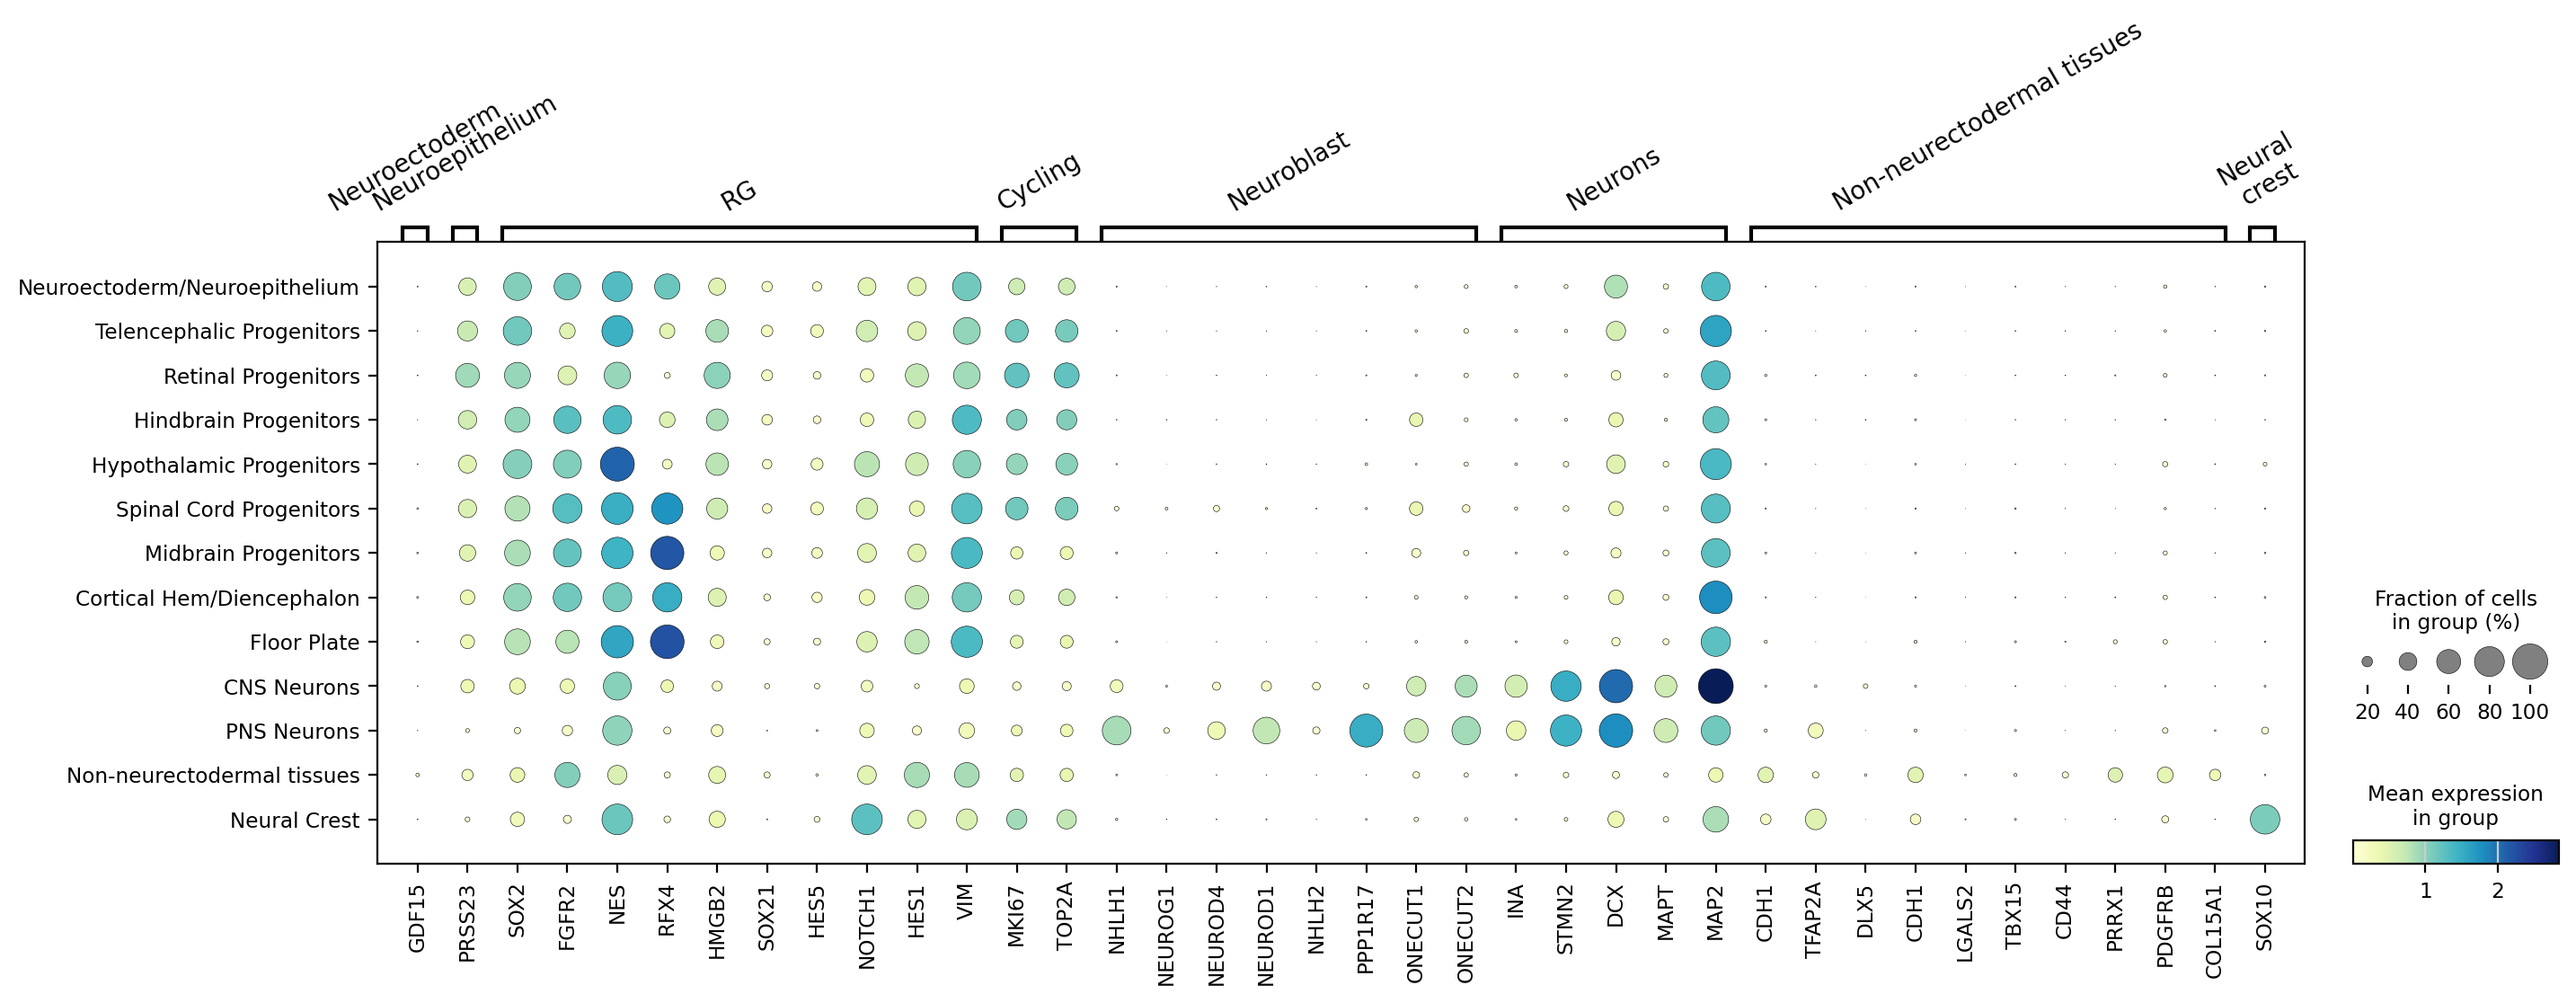

In [5]:
cell_class_order = ['Neuroectoderm/Neuroepithelium',
                    'Telencephalic Progenitors',
                    'Retinal Progenitors',
                     'Hindbrain Progenitors',
                    'Hypothalamic Progenitors',
                     'Spinal Cord Progenitors',
                    'Midbrain Progenitors',
                    'Cortical Hem/Diencephalon',
                     'Floor Plate',
                    'CNS Neurons',
                    'PNS Neurons', 
                    'Non-neurectodermal tissues',
                    'Neural Crest']
    

adata.obs['fullname_v5'] = adata.obs['fullname_v5'].cat.reorder_categories(cell_class_order, ordered=True)


cell_class ={'Neuroectoderm': ['GDF15'],#'CDKNA1'
              'Neuroepithelium':['PRSS23'],
             'RG': ['SOX2', 'FGFR2', 'NES', 'RFX4',
             'HMGB2', 'SOX21', 'HES5', 'NOTCH1', 'HES1', 'VIM'], 
             'Cycling': ['MKI67', 'TOP2A'],
              'Neuroblast': ['NHLH1', 'NEUROG1', 'NEUROD4', 'NEUROD1', 'NHLH2', 'PPP1R17', 'ONECUT1', 'ONECUT2'],
             'Neurons': ['INA', 'STMN2', 'DCX', 'MAPT', 'MAP2'],
             "Non-neurectodermal tissues": ["CDH1","TFAP2A", "DLX5", "CDH1","LGALS2",'TBX15', "CD44", "PRRX1", "PDGFRB","COL15A1"],
               'Neural\ncrest': [ 'SOX10'],
         
            }
plt.rcParams['pdf.fonttype'] = 42 
sc.pl.dotplot(adata,cell_class, 'fullname_v5', dendrogram=False,var_group_rotation=30,
              cmap='YlGnBu', save='fullname_v5_dotplot_cell_class.pdf') 




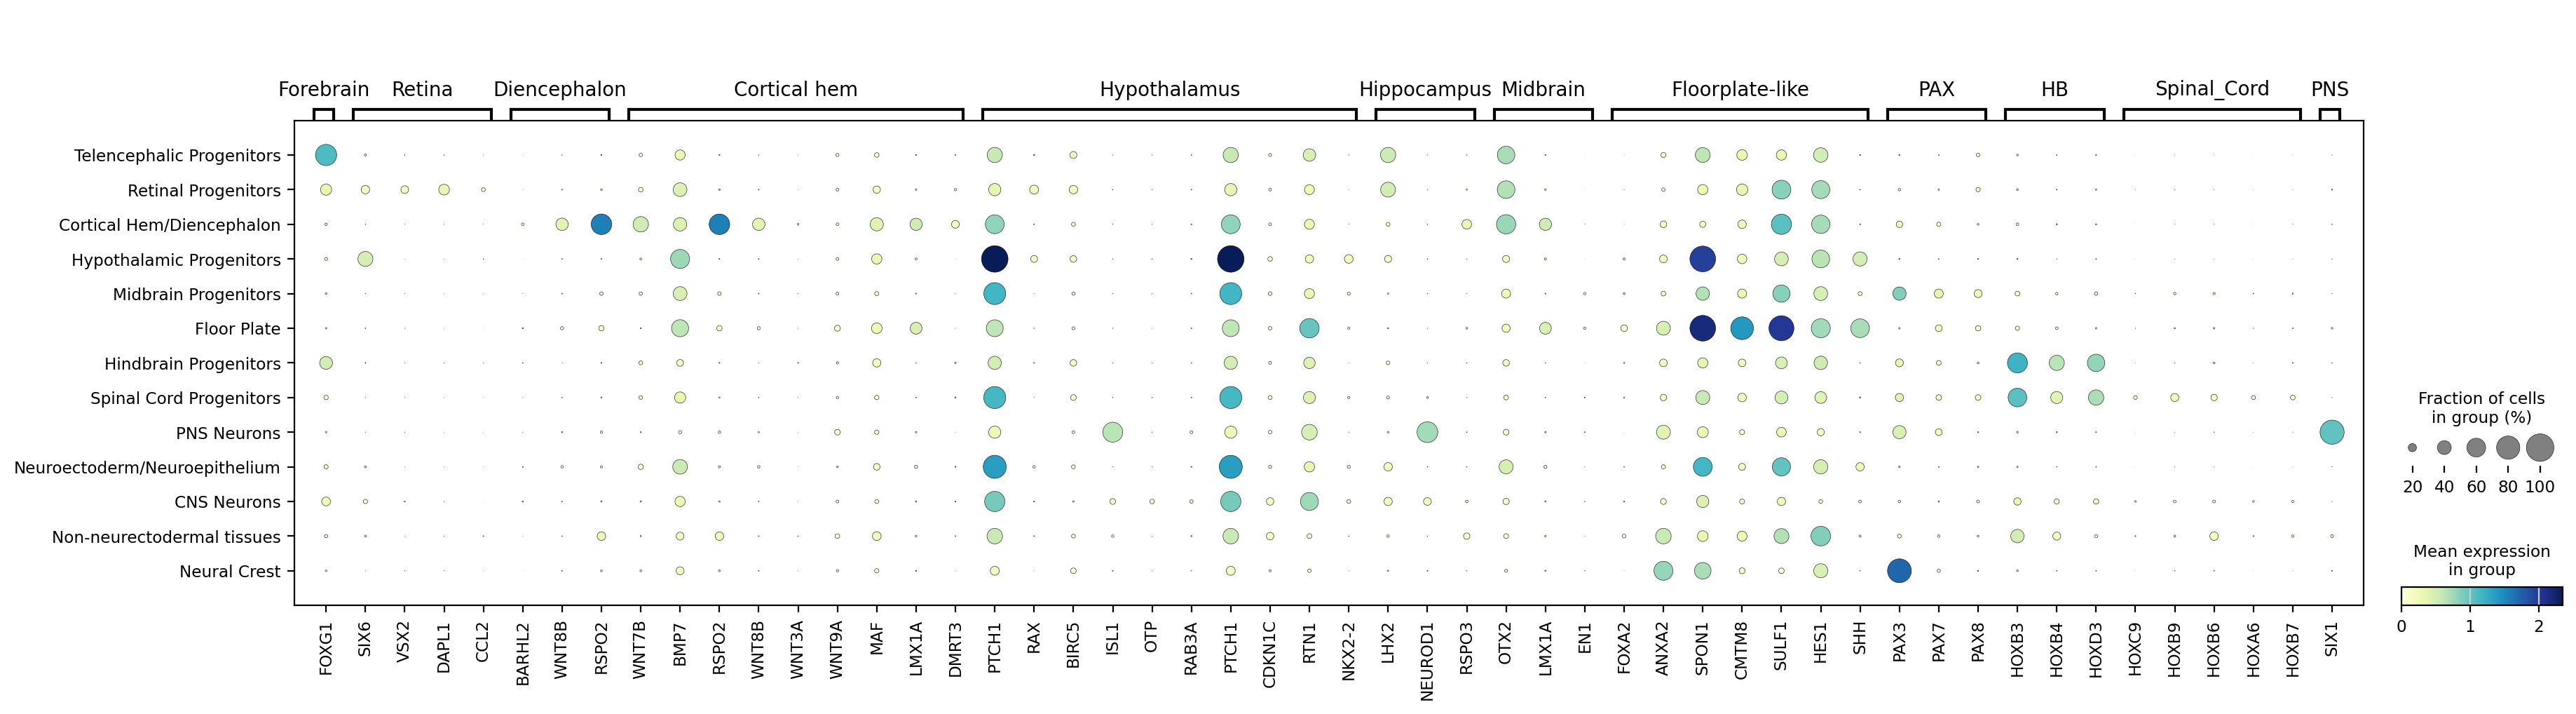

In [12]:
region_order = [ 'Telencephalic Progenitors',
                'Retinal Progenitors',
                'Cortical Hem/Diencephalon',
                'Hypothalamic Progenitors',
                'Midbrain Progenitors',
                'Floor Plate',
                'Hindbrain Progenitors',
                'Spinal Cord Progenitors',
                 'PNS Neurons',
                'Neuroectoderm/Neuroepithelium',
                'CNS Neurons',
                'Non-neurectodermal tissues',
                'Neural Crest', ]
   


adata.obs['fullname_v5'] = adata.obs['fullname_v5'].cat.reorder_categories(region_order, ordered=True)

region = {
    'Forebrain': 'FOXG1',
    "Retina": ["SIX6", "VSX2",'DAPL1', 'CCL2'],
    "Diencephalon": ["BARHL2", "WNT8B", "RSPO2"],
     'Cortical hem': ["WNT7B", "BMP7", "RSPO2", "WNT8B", "WNT3A","WNT9A","MAF", "LMX1A","DMRT3"],
    "Hypothalamus": ["PTCH1","RAX",'BIRC5', 'ISL1', 'OTP','RAB3A','PTCH1',
                            'CDKN1C',  'RTN1',
                               'NKX2-2'],
    'Hippocampus': [ 'LHX2', 'NEUROD1', 'RSPO3'],
    'Midbrain':["OTX2", "LMX1A", "EN1"],
    'Floorplate-like':['FOXA2', 'ANXA2', 'SPON1', 'CMTM8', 'SULF1', 'HES1','SHH'],
    'PAX' :['PAX3', 'PAX7', 'PAX8'],
    "HB": ["HOXB3", 'HOXB4', 'HOXD3'],
    "Spinal_Cord": ["HOXC9", "HOXB9",'HOXB6','HOXA6',
                               'HOXB7'],
    "PNS": ["SIX1"]
    }
plt.rcParams['pdf.fonttype'] = 42 
sc.pl.dotplot(adata,region, 'fullname_v5', dendrogram=False,var_group_rotation=0,
              cmap='YlGnBu', save='fullanme_v5dotplot_region.pdf') 




1


In [11]:
adata.write_h5ad(Path(path_file)/'exp1_processed_5_1.h5ad')